In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import seaborn as sns
from collections import OrderedDict, Counter
import os
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/tweets_total.csv', encoding = 'utf-8')  

df = df[(df['date'] > '2015-07-01 00:00:00') & (df['date'] < '2015-09-30 09:00:00')]

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Atores mais influentes

In [4]:
df_tweet = df[['username','retweets_count','likes_count']]

In [5]:
df_tweet = df_tweet.groupby(['username']).sum().sort_values(by='retweets_count', ascending=False)

In [6]:
df_tweet = df_tweet.reset_index()


<BarContainer object of 5 artists>

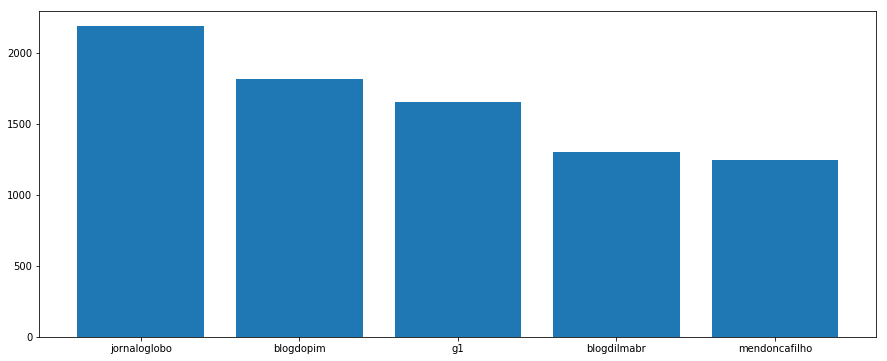

In [7]:
plt.figure(figsize=(15,6))
plt.bar(df_tweet.iloc[:5]['username'].values,df_tweet.iloc[:5]['retweets_count'].values)

In [10]:
df_tweet

,username,retweets_count,likes_count
0,jornaloglobo,2191.0,2696.0
1,blogdopim,1818.0,1768.0
2,g1,1657.0,2476.0
3,blogdilmabr,1302.0,1159.0
4,mendoncafilho,1244.0,1047.0
5,ro_moller,1182.0,1082.0
6,reinaldoazevedo,1134.0,1185.0
7,blogdonoblat,1103.0,956.0
8,folha,1060.0,1396.0
9,muylaerte,1040.0,684.0
